In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [5]:
df=pd.read_csv("Information.csv", encoding='ISO-8859-1')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

In [7]:
cols=['_unit_id', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'profile_yn', 'profile_yn:confidence', 'created', 'profile_yn_gold', 'profileimage', 'tweet_coord', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone', 'description', 'gender_gold', 'retweet_count', '_golden', 'name']

In [8]:
df.drop(cols, axis=1, inplace=True) #dropping all columns that are not needed/have very less number of entries

In [9]:
df.dropna(inplace=True) #dropping all rows with NULL gender values

In [10]:
df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [11]:
df=df[df['gender']!='unknown'] #removing all unknown gender values
df=df[df['gender']!='brand'] #removing all brand values from gender

In [12]:
df.reset_index(inplace=True) #resetting index of all rows
df.drop('index', axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12894 entries, 0 to 12893
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             12894 non-null  object 
 1   gender:confidence  12894 non-null  float64
 2   fav_number         12894 non-null  int64  
 3   link_color         12894 non-null  object 
 4   sidebar_color      12894 non-null  object 
 5   text               12894 non-null  object 
 6   tweet_count        12894 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 503.7+ KB


In [14]:
df.describe()

,gender:confidence,fav_number,tweet_count
count,12894.000000,12894.000000,1.289400e+04
mean,0.916154,5475.316194,2.945312e+04
std,0.165393,13118.359541,7.072127e+04
min,0.320600,0.000000,1.000000e+00
25%,1.000000,137.000000,2.273750e+03
50%,1.000000,1126.000000,9.306000e+03
75%,1.000000,4956.500000,3.023525e+04
max,1.000000,341621.000000,2.680199e+06


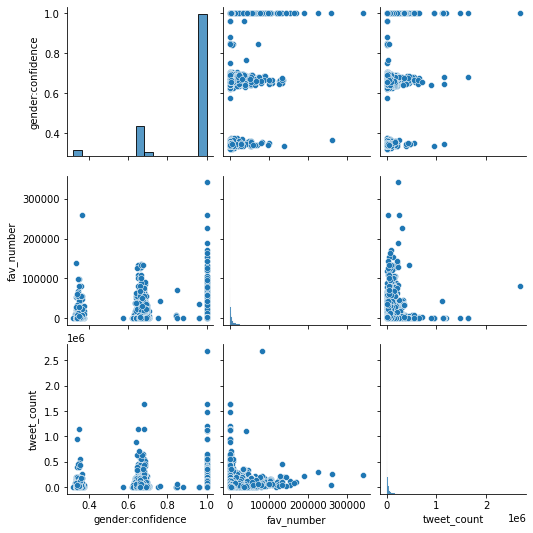

In [15]:
sb.pairplot(df) 

<AxesSubplot:>

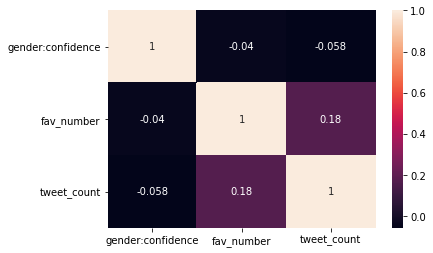

In [16]:
sb.heatmap(df.corr(), annot=True) #heatmap to check dependency between variables

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder() #label encoding gender
df['gender']=le.fit_transform(df['gender']) 

In [19]:
le2=LabelEncoder() #label encoding link_color
df['link_color']=le2.fit_transform(df['link_color']) 

In [20]:
#Q1) average no of words in tweets

In [21]:
total_words=int()
for i in range(df.shape[0]):
    total_words=total_words+len(df['text'][i].split())
print("Average no of Words: ", total_words/df.shape[0])

Average no of Words:  16.042655498681558


In [22]:
#Q2) preferred link_color

In [23]:
oc=str(); mc=str(); fc=str()
le.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [24]:
df['link_color'].value_counts()

51      5742
701      415
1323     404
1268     375
1723     358
        ... 
525        1
533        1
541        1
549        1
2043       1
Name: link_color, Length: 2127, dtype: int64

In [25]:
maledf=df[df['gender']==1]
maledf['link_color'].value_counts()

51      3090
1323     284
701      257
599      201
1723     178
        ... 
862        1
858        1
850        1
846        1
1925       1
Name: link_color, Length: 871, dtype: int64

In [26]:
femaledf=df[df['gender']==0]
femaledf['link_color'].value_counts()

51      2652
1960     283
1268     283
1723     180
1417     167
        ... 
1354       1
1370       1
1374       1
1386       1
2095       1
Name: link_color, Length: 1336, dtype: int64

In [27]:
oc=mc=fc=51

In [28]:
le2.inverse_transform([51])

array(['0084B4'], dtype=object)

In [29]:
#'0084B4' is the hex color code for the color "Strong blue"
print("preferred color - overall: ", le2.inverse_transform([51]), "(Strong blue)")
print("preferred color - male: ", le2.inverse_transform([51]), "(Strong blue)")
print("preferred color - female: ", le2.inverse_transform([51]), "(Strong blue)")

preferred color - overall:  ['0084B4'] (Strong blue)
preferred color - male:  ['0084B4'] (Strong blue)
preferred color - female:  ['0084B4'] (Strong blue)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12894 entries, 0 to 12893
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             12894 non-null  int32  
 1   gender:confidence  12894 non-null  float64
 2   fav_number         12894 non-null  int64  
 3   link_color         12894 non-null  int32  
 4   sidebar_color      12894 non-null  object 
 5   text               12894 non-null  object 
 6   tweet_count        12894 non-null  int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 503.7+ KB


In [31]:
import nltk

In [32]:
from nltk.tokenize import word_tokenize

In [33]:
from nltk.corpus import stopwords

In [34]:
list_of_stopwords = list(stopwords.words('english'))

In [35]:
from nltk.stem import WordNetLemmatizer

In [36]:
wl=WordNetLemmatizer()

In [37]:
df['text']

0        Robbie E Responds To Critics After Win Against...
1        ÛÏIt felt like they were my friends and I was...
2        i absolutely adore when louis starts the songs...
3        Hi @JordanSpieth - Looking at the url - do you...
4        Watching Neighbours on Sky+ catching up with t...
                               ...                        
12889    @lookupondeath ...Fine, and I'll drink tea too...
12890    Greg Hardy you a good player and all but don't...
12891    You can miss people and still never want to se...
12892    @bitemyapp i had noticed your tendency to pee ...
12893    I think for my APUSH creative project I'm goin...
Name: text, Length: 12894, dtype: object

In [38]:
import re as regex

In [39]:
clean_text=list() #cleaning the 'text' field in dataframe
for i in df['text']:
    temp=word_tokenize(i); temp2=str()
    for j in temp:
        if (regex.search("^[a-zA-Z]+$", j)==None) or (j in list_of_stopwords) or (j=="https") or (regex.search("^//", j)!=None) or (j=="#") or (j=="!") or (j==":") or (j=="?"):temp.remove(j)
    for j in temp:
        j=wl.lemmatize(j)
    for j in temp:
        temp2+=j+" "
    clean_text.append(temp2)

In [40]:
df["clean"]=clean_text

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12894 entries, 0 to 12893
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             12894 non-null  int32  
 1   gender:confidence  12894 non-null  float64
 2   fav_number         12894 non-null  int64  
 3   link_color         12894 non-null  int32  
 4   sidebar_color      12894 non-null  object 
 5   text               12894 non-null  object 
 6   tweet_count        12894 non-null  int64  
 7   clean              12894 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 554.1+ KB


In [42]:
from sklearn.feature_extraction.text import CountVectorizer #creating a sparse matrix for all words in 'clean'
cv = CountVectorizer()
sparse_matrix = cv.fit_transform(df["clean"])

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(sparse_matrix, df['gender'].values)

In [44]:
#Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()
logReg.fit(x_train, y_train)
y_pred_logReg=logReg.predict(x_test)

c:\users\shiva\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
#Naive Bayes Algorithm

In [47]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train, y_train)
y_pred_nb=nb.predict(x_test)

In [48]:
#SVM

In [49]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train, y_train)
y_pred_sv=sv.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score #accuracy of all algorithms as a percentage
print("Logistic Regression: ", accuracy_score(y_test, y_pred_logReg)*100, "%")
print("Naive Bayes Algorithm: ", accuracy_score(y_test, y_pred_nb)*100, "%")
print("Support Vector Machine: ", accuracy_score(y_test, y_pred_sv)*100, "%")

Logistic Regression:  59.987593052109176 %
Naive Bayes Algorithm:  61.07320099255583 %
Support Vector Machine:  59.11910669975185 %


In [51]:
#Ensemble ML Model(combining 3 previous models)

In [52]:
from statistics import mode

In [53]:
y_pred_ensemble=list(); a=y_pred_logReg; b=y_pred_nb; c=y_pred_sv; l=list()
for i in range(x_test.shape[0]):
    temp=[a[i], b[i], c[i]]
    l.append(temp)

In [54]:
for i in range(x_test.shape[0]):
    if (a[i]!=b[i]) and (a[i]!=c[i]) and (b[i]!=c[i]):
        y_pred_ensemble.append(1) #appending female if all are different since largest no of entries are female
    else:
        temp=[a[i], b[i], c[i]]
        y_pred_ensemble.append(mode(temp))

In [55]:
print("Ensemble Learning Model(lr+nb+svm): ", accuracy_score(y_test, y_pred_ensemble)*100, "%")

Ensemble Learning Model(lr+nb+svm):  61.32133995037221 %
